# Компьютерное зрение

# Работа с графиками (в двух словах)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
xs = np.arange(-5, 5)
ys = np.random.randint(0, 5, size=10)
print(ys)

[3 4 2 4 4 1 2 2 2 4]


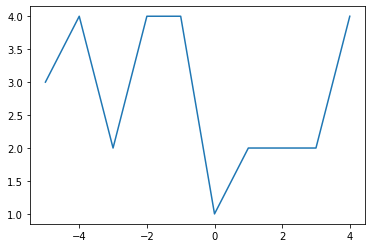

In [2]:
plt.plot(xs, ys)
plt.show()

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

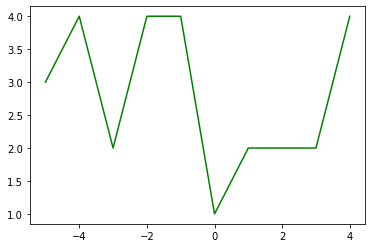

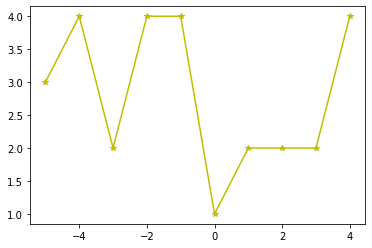

In [4]:
plt.plot(xs, ys, 'g')
plt.show()
plt.plot(xs, ys, 'y-*')
plt.show()

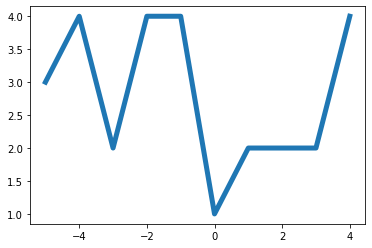

In [5]:
plt.plot(xs, ys, linewidth=5)
plt.show()

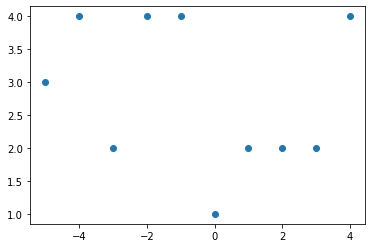

In [6]:
plt.scatter(xs, ys)
plt.show()

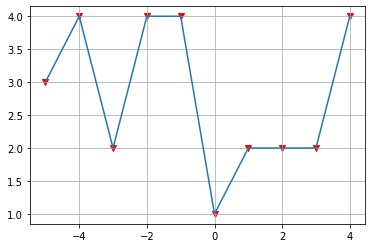

In [7]:
plt.plot(xs, ys)
plt.scatter(xs, ys, c='red', marker='v')
plt.grid()
plt.show()

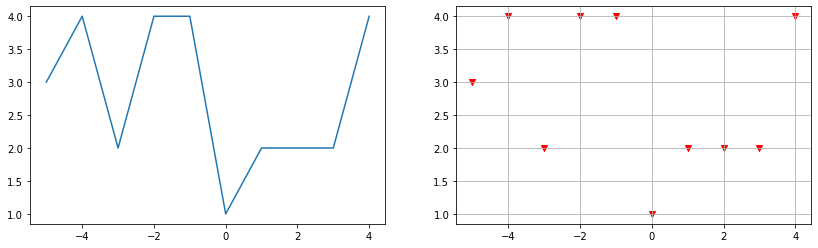

In [8]:
# Несколько графиков
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Выбор подграфика (кол-во строк, кол-во столбцов, № графика)
plt.plot(xs, ys)
plt.subplot(1, 2, 2)
plt.scatter(xs, ys, c='red', marker='v')
plt.grid()
plt.show()

# Компьютерное представление изображения

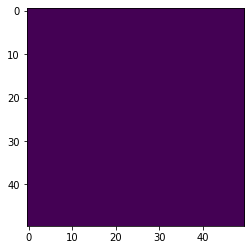

In [9]:
image = np.zeros((50, 50))
plt.imshow(image)
plt.show()

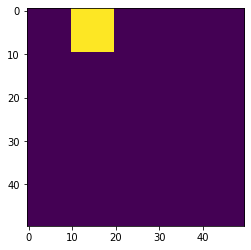

In [10]:
image[:10, 10:20] = 1
plt.imshow(image)
plt.show()

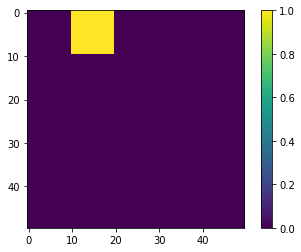

In [11]:
plt.imshow(image)
plt.colorbar()  # Показать соответствие цвета и значения
plt.show()

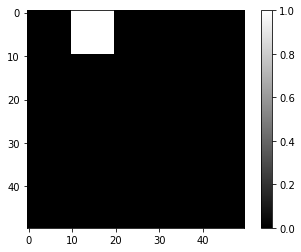

In [12]:
# Смена цветовой карты на чёрно-белую
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

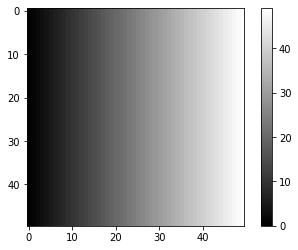

In [15]:
image = np.fromfunction(lambda y, x: x, shape=(50, 50))
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

In [16]:
image

array([[ 0.,  1.,  2., ..., 47., 48., 49.],
       [ 0.,  1.,  2., ..., 47., 48., 49.],
       [ 0.,  1.,  2., ..., 47., 48., 49.],
       ...,
       [ 0.,  1.,  2., ..., 47., 48., 49.],
       [ 0.,  1.,  2., ..., 47., 48., 49.],
       [ 0.,  1.,  2., ..., 47., 48., 49.]])

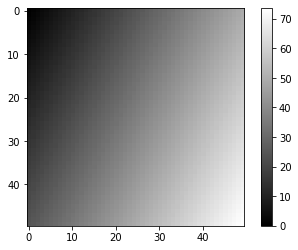

In [17]:
image = np.fromfunction(lambda y, x: x + y / 2, shape=(50, 50))
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

In [18]:
image

array([[ 0. ,  1. ,  2. , ..., 47. , 48. , 49. ],
       [ 0.5,  1.5,  2.5, ..., 47.5, 48.5, 49.5],
       [ 1. ,  2. ,  3. , ..., 48. , 49. , 50. ],
       ...,
       [23.5, 24.5, 25.5, ..., 70.5, 71.5, 72.5],
       [24. , 25. , 26. , ..., 71. , 72. , 73. ],
       [24.5, 25.5, 26.5, ..., 71.5, 72.5, 73.5]])

### Трёхканальные изображения (RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


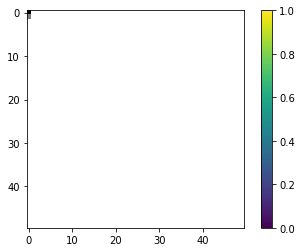

In [34]:
# Необходимо, чтобы числа были от 0 до 1, либо от 0 до 255 и быть типа uint8
image_rgb = np.stack([image, image, image], axis=-1)
plt.imshow(image_rgb)
plt.colorbar()
plt.show()

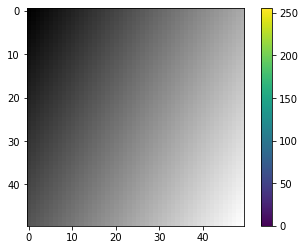

In [35]:
image_rgb = np.stack([image, image, image], axis=-1)
image_rgb = (image_rgb / image_rgb.max()) * 255
image_rgb = image_rgb.astype(np.uint8)
plt.imshow(image_rgb)
plt.colorbar()
plt.show()

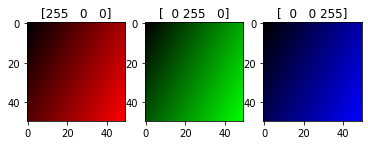

In [40]:
# 1 канал - красный, 2 - зелёный, 3 - синий
for i in range(3):
    image_out = np.zeros_like(image_rgb)  # Копирование размера и типа данных
    image_out[:, :, i] = image_rgb[:, :, i]
    
    plt.subplot(1, 3, i+1)
    plt.title(f'{image_out[-1, -1]}')
    plt.imshow(image_out)

plt.show()

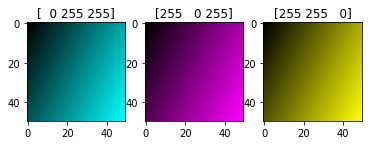

In [41]:
for i in range(3):
    image_out = image_rgb.copy()
    image_out[:, :, i] = 0  # Зануляем один из каналов
    
    plt.subplot(1, 3, i+1)
    plt.title(f'{image_out[-1, -1]}')
    plt.imshow(image_out)

plt.show()

# Библиотека OpenCV

<img src="images/LessonsI/opencv.png" width=15% height=15% />

**OpenCV** (Open Source Computer Vision Library) — библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Реализована на C/C++, также разрабатывается для Python, Java, Ruby, Matlab, Lua и других языков

(256, 256, 3)


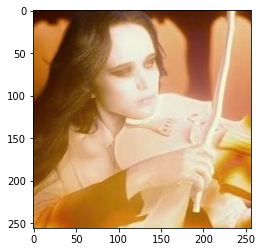

In [49]:
import matplotlib.pyplot as plt
# Чтение картинки (чтение происходит в цветовой модели BGR)

img_bgr = cv2.imread('data/Vanya.jpg')
print(img_bgr.shape)
plt.imshow(img_bgr)
plt.show()

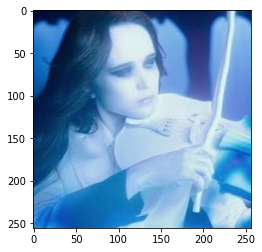

In [65]:
# Для перевода в RGB можно либо воспользоваться функцией opencv, либо инвертировать каналы
image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
image = img_bgr[:, :, ::-1]  # Каналы - третье измерение изображения
plt.imshow(image)
plt.show()

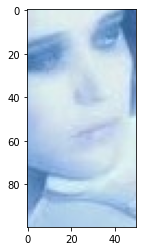

In [67]:
# Массив остаётся массивом
crop = image[50:150, 100: 150]
plt.imshow(crop)
plt.show()

(256, 256)


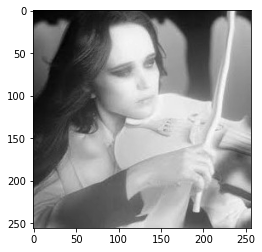

In [51]:
# Есть возможность сразу читать в цветовой модели Grayscale
img_gray = cv2.imread('data/Vanya.jpg', 0)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')
plt.show()

# Цветовые пространства

<img src="images/LessonsI/YUV.png" alt="YUV" height=20% width=20%>  
**YUV — цветовая модель, в которой цвет состоит из трёх компонентов — яркость (Y) и два цветоразностных компонента (U и V)**

#### Компоненты YUV на основе компонент RGB  

Y = Kr*R + (1 - Kr - Kb)*G + Kb*B

U = B - Y

V = R - Y

<img src="images/LessonsI/IpCob_YUV.png"  alt="YUV" height=40% width=40%> 
<img src="images/LessonsI/image007.jpg" alt="YUV" height=40% width=40%> 

(256, 256, 3)


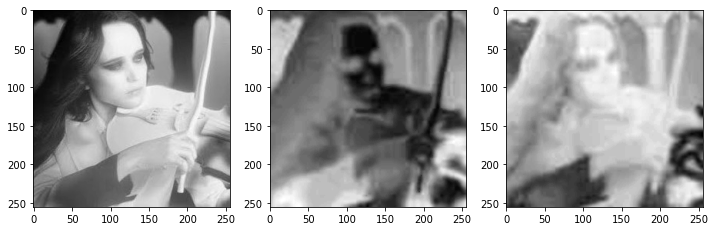

In [54]:
image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
print(image.shape)
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(image[:, :, i], cmap='gray')
plt.show()

<img src="images/LessonsI/HSV.png" alt="HSV" height=20% width=20%>

HSV (англ. Hue, Saturation, Value — тон, насыщенность, значение) или HSB (англ. Hue, Saturation, Brightness — тон, насыщенность, яркость) — цветовая модель, в которой координатами цвета являются:

* Hue — цветовой тон, (например, красный, зелёный или сине-голубой). Варьируется в пределах 0—360°, однако иногда приводится к диапазону 0—100 или 0—1.
* Saturation — насыщенность. Варьируется в пределах 0—100 или 0—1. Чем больше этот параметр, тем «чище» цвет, поэтому этот параметр иногда называют чистотой цвета. А чем ближе этот параметр к нулю, тем ближе цвет к нейтральному серому.
* Value (значение цвета) или Brightness — яркость. Также задаётся в пределах 0—100 или 0—1.

(256, 256, 3)


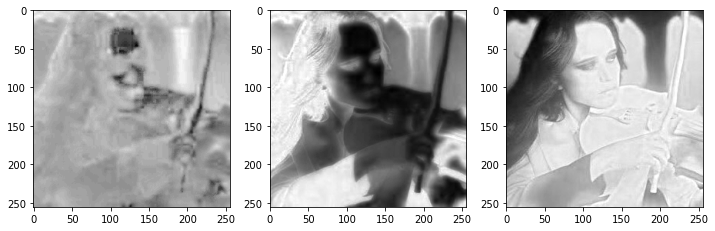

In [55]:
# HSV (англ. Hue, Saturation, Value — тон, насыщенность, значение)
image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
print(image.shape)
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(image[:, :, i], cmap='gray')
plt.show()

# Гистограмма

Гистограмма распределения частот - это столбиковая диаграмма, каждый столбец которой опирается на конкретное значение признака или разрядный интервал (для сгруппированных частот). Высота столбика пропорциональна частоте встречаемости соответствующего значения.

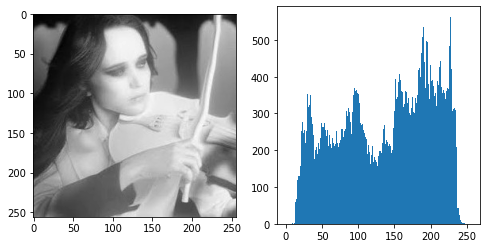

In [61]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), range=(0, 255), bins=256)
plt.show()

https://images1.russianblogs.com/51/77/775210b293dc1b110f9ca24afb62a67b.png

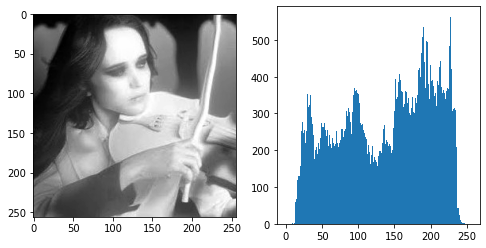

In [63]:
img_eq = cv2.equalizeHist(img_gray)  # Выравнивание гистограммы 

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_eq, cmap='gray')
plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), range=(0, 255), bins=256)
plt.show()

clahe
https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

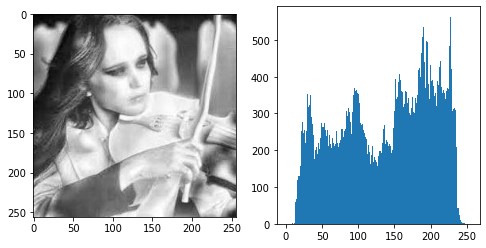

In [73]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))  # Выравнивание по окрестности
img_eq = clahe.apply(img_gray)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_eq, cmap='gray')
plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), range=(0, 255), bins=256)
plt.show()

# Работа с изображениями с использованием свёрток

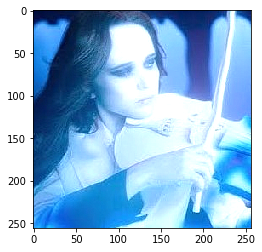

In [2]:
# увеличение чёткости
kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,    2, -0.1],
    [-0.1, -0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

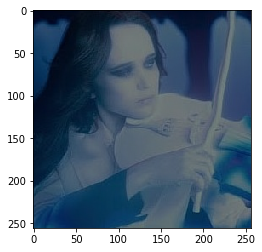

In [3]:
# затемнение
kernel = np.array([
    [-0.1,  0.1, -0.1],
    [ 0.1,  0.5,  0.1],
    [-0.1,  0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

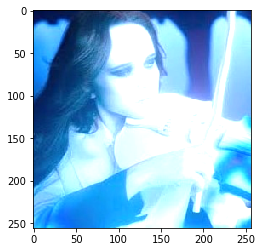

In [4]:
# увеличение яркости
kernel = np.array([
    [-0.1,  0.2, -0.1],
    [ 0.2,    1,  0.2],
    [-0.1,  0.2, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

### Выделение границ

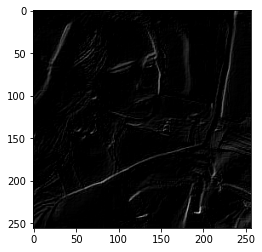

In [77]:
# фильтр Робертса
kernel = np.array([
    [1,  0],
    [0, -1],
])
img_out = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_out, cmap='gray')
plt.show()

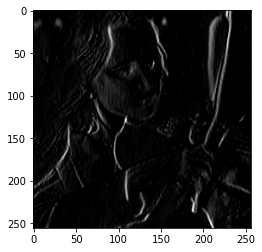

In [78]:
# фильтр Превитт
kernel = np.array([
    [-1,  0, 1],
    [-1,  0, 1],
    [-1,  0, 1],
])
img_out = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_out, cmap='gray')
plt.show()

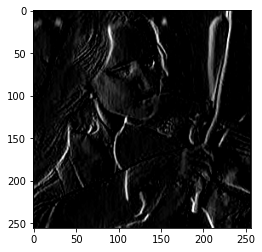

In [79]:
# фильтр Собеля
kernel = np.array([
    [-1,  0, 1],
    [-2,  0, 2],
    [-1,  0, 1],
])
img_out = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_out, cmap='gray')
plt.show()

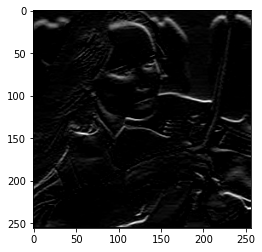

In [80]:
# фильтр Собеля горизонтальный
kernel = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1],
])
img_out = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_out, cmap='gray')
plt.show()

# Работа с видео

In [7]:
# Получение видео. Объект VideoCapture позволяет работать с видеопотоком с камеры или из файла
# Для работы с файлом указывается путь к нему, для работы с вебкамерой указывается её номер, начиная с 0
cap = cv2.VideoCapture(0)
# Кадр получается с помощью метода read (возвращается флаг успешной операции и кадр)
# ret - returns : bool
ret, frame = cap.read()
# После работы с камерой VideoCapture освобождается
cap.release()

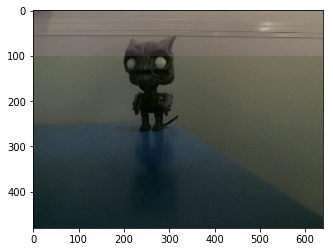

In [10]:
# Изображение получается в формате BGR
plt.imshow(frame)
plt.show()

In [11]:
# OpenCV позволяет выводить кадры в отдельном окне. Для этого служит функция imshow
# На вход подаётся изображение в формате BGR
# Первым аргументом укзывается имя окна
cv2.imshow('Frame', frame)
# Для задержки показа используется функция waitKey
# Аргумент указывает задержку в мс. Если 0, то ждёт нажатия любой клавиши
# Функция waitKey возвращает код нажатой клавиши
cv2.waitKey(0)
# После работы с ним окно удаляется
cv2.destroyWindow('Frame')

### Воспроизведение видео

In [12]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    key = cv2.waitKey(20) & 0xff
    cv2.imshow('Frame', frame)
    if key == 27: # Esc
        break
        
cv2.destroyWindow('Frame')
cap.release()

# Рисование

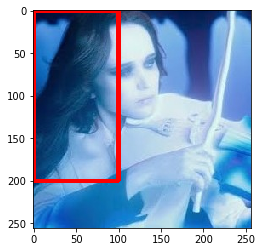

In [13]:
# Прямоугольник
image2 = image.copy()
cv2.rectangle(image2, (0, 0), (100, 200), (255, 0, 0, 55), 4)
plt.imshow(image2)
plt.show()

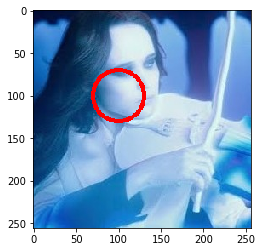

In [14]:
# Круг
image2 = image.copy()
cv2.circle(image2, (100, 100), 30, (255, 0, 0), 4)
plt.imshow(image2)
plt.show()

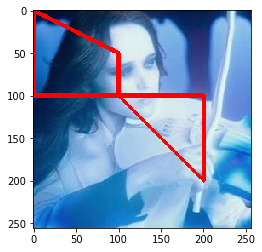

In [44]:
# Контур
image2 = image.copy()
contours = [
    np.array([(0, 0), (0, 100), (100, 100), (100, 50)]),
    np.array([(200, 200), (100, 100), (200, 100)]),
]
cv2.drawContours(image2, contours, -1, (255, 0, 0), 4)

plt.imshow(image2)
plt.show()

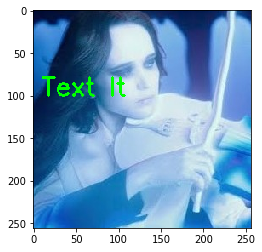

In [25]:
# Текст
image2 = image.copy()
cv2.putText(image2, 'Text It', (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
plt.imshow(image2)
plt.show()

# Работа с изображением

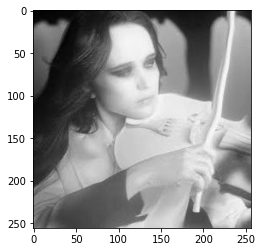

In [81]:
# Перевод в градации серого
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

https://images1.russianblogs.com/240/2d/2db6ec6864d73345d8af0ccb3268e590.png

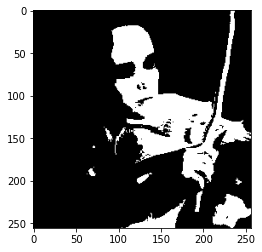

In [82]:
# Бинаризация
_, thresh = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

In [83]:
# Поиск контуров
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours), contours[2])

71 [[[133 247]]

 [[134 246]]

 [[135 247]]

 [[134 248]]]


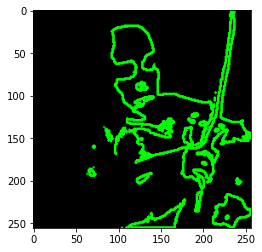

In [85]:
# Рисование контуров
image_out = np.zeros_like(image)
image_out = cv2.drawContours(image_out, contours, -1, (0, 255, 0), 2)
plt.imshow(image_out)
plt.show()

# Задания

1. Для данных [Nails segmentation](https://www.kaggle.com/vpapenko/nails-segmentation) объедините пары изображение-маска (список файлов получить с помощью библиотеки os название парных изображений совпадают)
2. Выведите по очереди пары с помощью OpenCV эти пары (переключение по нажатию клавиши)
3. Выделите контуры на масках и отрисуйте их на изображениях
4. Воспроизведите любой видеофайл с помощью OpenCV в градациях серого

# Лабораторная работа 5. Красный свет / зелёный свет
Необходимо средствами OpenCV реализовать детскую корейскую игру “Красный свет / зелёный свет”. 

<img src="images/LessonsI/GreenRed.png" alt="GreenRed" height=40% width=40%>

## Лабораторная 5.1

Программа должна реализовывать следующий функционал:  
  
1. Покадровое получение видеопотока с камеры. Использовать камеру ноутбука, вебкамеру или записать видео файл с вебкамеры товарища и использовать его.  
2. Реализовать обнаружение движения в видеопотоке: попарно сравнивать текущий и предыдущий кадры.
3. По мере проигрывания видео в отдельном окне отрисовывать двухцветную карту с результатом: красное - есть движение, зелёное - нет движения
4. Добавить таймер, по которому включается и выключается обнаружение движения. О текущем режиме программы сообщать текстом с краю изображения: “Красный свет” - движение обнаруживается, “Зелёный свет” - движение не обнаруживается.
5. Реализовать более сложный алгоритм обнаружения движения, устойчивый к шумам вебкамеры (OpticalFlow)